(80, 60) (81,) (61,)
Check normalization: 1.0
Slope in linear regression of $f(t_n)$ to $u(t_n)$: 0.3482049436092311


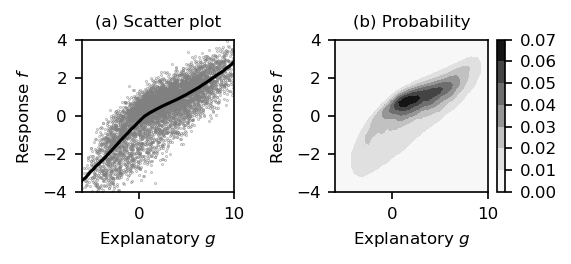

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

plt.rcParams["font.size"]=8
plt.rcParams["axes.titlesize"]=8


ds_fig2 = xr.open_dataset("fig2.nc")
g = np.array(ds_fig2.g)
f = np.array(ds_fig2.f)

### Calculate PDF
d = np.hstack([g[:,1000:].reshape(g.shape[0]*(g.shape[1]-1000),1),f[:,1000:].reshape(f.shape[0]*(f.shape[1]-1000),1)])
# d = np.hstack([g[:,:].reshape(g.size,1),z[:,:].reshape(z.size,1)])
d_sample, d_dim = d.shape
d_hist, bins = np.histogramdd(d,bins=(80,60))
bin_width = [bins[i][1] - bins[i][0]  for i in range(len(bins))]
bin_volume = np.prod(bin_width)
pdf = d_hist / (d_sample * bin_volume)
print(pdf.shape, bins[0].shape, bins[1].shape)
print("Check normalization:", np.sum(pdf)*bin_volume)

from scipy import stats
linreg = stats.linregress(d)
# print(r"$\Omega$ in MZ projection:", omega[0,0])
print(r"Slope in linear regression of $f(t_n)$ to $u(t_n)$:", linreg.slope)
#print(r"Intercept in linear regression:", linreg.intercept)

def estimate_func(pdf):
    y = (bins[1][1:]+bins[1][:-1])/2
    dy = bins[1][1]-bins[1][0]
    estimate = np.sum(y.reshape(1,len(y))*pdf*dy,axis=1)/np.sum(pdf*dy,axis=1)
    return estimate
est = estimate_func(pdf)

nplot=d.shape[0]
nskip=300
fig=plt.figure(figsize=(3.9,1.8),dpi=150)
ax=fig.add_subplot(121)
scat=ax.scatter(d[:nplot:nskip,0],d[:nplot:nskip,1],c="grey",s=0.05)
ax.plot((bins[0][1:]+bins[0][:-1])/2,est,c="k")
ax.set_title("(a) Scatter plot")
ax.set_xlabel(r"Explanatory $g$")
ax.set_ylabel(r"Response $f$")
ax.set_xlim(d[:,0].min(),d[:,0].max())
ax.set_ylim(d[:,1].min(),d[:,1].max())
ax.set_xlim(-6,10); ax.set_ylim(-4,4)
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
#ax.set_aspect("equal")

ax=fig.add_subplot(122)
# quad = ax.pcolormesh(bins[0],bins[1],pdf.T,cmap="Greys")
quad = ax.contourf((bins[0][1:]+bins[0][:-1])/2,(bins[1][1:]+bins[1][:-1])/2,pdf.T,cmap="Greys")
# ax.plot(bins[0],linreg.slope*bins[0]+linreg.intercept,c="y")
# ax.plot(bins[0],omega[0,0]*bins[0],c="y")
ax.set_title("(b) Probability")
ax.set_xlabel(r"Explanatory $g$")
ax.set_ylabel(r"Response $f}$")
ax.set_xlim(d[:,0].min(),d[:,0].max())
ax.set_ylim(d[:,1].min(),d[:,1].max())
ax.set_xlim(-6,10); ax.set_ylim(-4,4)
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
#ax.set_aspect("equal")
plt.colorbar(quad)
plt.tight_layout()
scat.set_rasterized(True)
plt.tight_layout()
plt.savefig("fig2.pdf")
plt.show()